In [9]:
import sys  
sys.path.insert(0, '../code')

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import experiment_manager as xpm

In [11]:
list_of_experiments = xpm.get_list_of_experiments("/home/sattler/Workspace/PyTorch/multilayer/results/layers_compare_big")

Loaded  9  Results from  /home/sattler/Workspace/PyTorch/multilayer/results/layers_compare_big

Hyperparameters: 
 {'dataset': ['EMNIST'], 'net': ['ConvNet'], 'n_clients': [100], 'dirichlet_alpha': [100.0], 'x_transform': ['rotation'], 'y_transform': [None, 'shift'], 'communication_rounds': [1000], 'local_epochs': [1], 'participation_rate': [0.1], 'batch_size': [128], 'layers': ['fc', 'all|.', 'conv|fc1', 'none', 'conv'], 'pretrained': [None], 'save_model': [None], 'log_frequency': [-100], 'log_path': ['layers_compare_big/'], 'job_id': [[49035]], 'finished': [False, True], 'log_id': [99693, 28834, 33595, 43052, 44372, 30267, 42766, 42107, 30355]}

Tracked Variables: 
 ['mean_accuracy', 'communication_round', 'epochs']


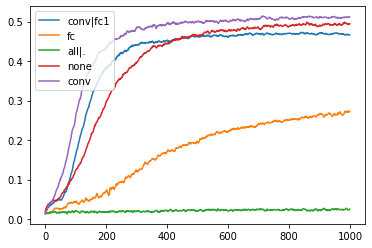

In [15]:
xps = filter(lambda x : x.hyperparameters["x_transform"]=="rotation" and
                        x.hyperparameters["y_transform"]=="shift",
            list_of_experiments)
for xp in xps:
    r = xp.results
    hp = xp.hyperparameters
    
    plt.plot(r["mean_accuracy"], label=hp["layers"])
    
plt.legend()
plt.show()

In [16]:
import re

In [27]:

bool(re.match("^((?!fc3\.bias).)*$", "fc3.bias"))

False